The sagemath cloud does the next line automatically.  We repeat it only so you know what happened when you started this notebook. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We need some initial imports to "fix" things and to enable us to do linear algebra. 

In [2]:
from __future__ import division
from scipy import linalg

#Note: Pylab automatically imports numpy as np
np.set_printoptions(precision=4, suppress = True)

1. (5 points) Find the singular value decomposition of A and explain why they imply that A is not invertible

In [3]:
A = matrix( [ [1,  2,  0,  0],
              [0,  1,  4,  1],
              [0,  4,  1,  4],
              [1,  2,  6,  0]] )
A

matrix([[1, 2, 0, 0],
        [0, 1, 4, 1],
        [0, 4, 1, 4],
        [1, 2, 6, 0]])

In [4]:
V, Sigma, Uh = linalg.svd(A)
# A = dot(dot(V, diag(Sigma)),Uh)

In [5]:
diag(Sigma)

array([[ 8.2899,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  4.9489,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  1.9457,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ]])

ANSWER: Since there is a zero eigenvalue of A, diagonal matrix Sigma doesn't have inverse matrix Therefore A doesn't have inverse (namely, not invertible)

2. (5 points) Use the singular value decomposition in exercise 1 to and the Moore-Penrose pseudo-inverse of A in exercise 1. Show that $A*Adag*A = A$ and $Adag*A*Adag = Adag$

In [6]:
from scipy.linalg import pinv2
# matrix(pinv2(A))
# linalg.pinv(A)

In [7]:
Sigmadag = copy(Sigma)
Sigmadag[3] = inf
Sigmadag = 1. / Sigmadag
Adag = dot(dot(transpose(Uh), diag(Sigmadag)),transpose(V))
Adag

array([[ 0.2476, -0.1149, -0.0546,  0.0857],
       [ 0.2702, -0.1121,  0.0697,  0.0631],
       [-0.096 ,  0.113 , -0.0282,  0.096 ],
       [-0.225 ,  0.1177,  0.1789, -0.1083]])

In [8]:
allclose(dot(dot(A,Adag),A), A)

True

In [9]:
allclose(dot(dot(Adag,A),Adag), Adag)

True

3. (5 points) Show that the matrix norm of A; which is given by linalg.norm(A,2), is equal to the largest singular value of A: What are the matrix norms of V and U in the singular value decomposition of A? Explain.

In [10]:
Sigma[0] 

8.28993411805242

In [11]:
linalg.norm(V,2) # == 1.0

1.0000000000000002

In [12]:
linalg.norm(Uh,2) # == 1.0

1.0

EXPLAIN: Sigma[0]== linalg.norm(A,2) since Sigma is a diagonal matrix containing the singular value of A on its diagonal. And it has descending order. Therefore, the first value, Sigma[0], is its largest value.
The singular value of V and U is 1. Because both of them are Unitary, which means they are orthogonal. Orthogonal matrices are invertible square matrices, so their singular values are their eigenvalues. Their eigenvalues are complex numbers whose norm is 1. 

4. (5 points) The Frobenius norm of a matrix is the sum of the squares of the entries in the matrix. Show for the matrix A in exercise 1 that the Frobenius norm is the square root of the sum of the squares of the singular values of A

In [13]:
sqrt(sum(Sigma**2)) # == linalg.norm(A,'fro')

9.8488578017961039

5. (10 points) Calculate the singular value decomposition of B; calculate the pseudo inverse of B; and use the result to solve the equation

In [14]:
B = array([[1,4,0],[1,1,1],[1,0,1],[0,4,1],[6,1,0],[1,6,1],[6,1,6]])
c = vstack(([6,5,4,6,13,10,25]))

In [15]:
V, Sigma, Uh = linalg.svd(B)

In [16]:
Sigmadag = copy(Sigma)
Sigmadag = 1. / Sigmadag
Sigmadag= np.c_[diag(Sigmadag), zeros((3,4))]
Sigmadag

array([[ 0.092 ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.1363,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.2585,  0.    ,  0.    ,  0.    ,  0.    ]])

In [17]:
Bdag = dot(dot(Uh.T, Sigmadag),V.T)
Bdag

array([[ 0.016 , -0.0009,  0.0018, -0.0358,  0.158 , -0.0144,  0.0082],
       [ 0.0611,  0.0091, -0.0068,  0.0597, -0.0002,  0.0889, -0.0251],
       [-0.0416,  0.022 ,  0.0261,  0.0345, -0.154 ,  0.0012,  0.1527]])

In [18]:
x = dot(Bdag, c)
x  # 

array([[ 2.],
       [ 1.],
       [ 2.]])

In [19]:
allclose(dot(B,x),c)  

True

6. (10 points) The following matrix can be thought of as an image of a plus sign

In [20]:
plus = zeros((9,9))
plus[:,3:6] = 1
plus[3:6,:] = 1
plus

array([[ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.]])

In [21]:
V, Sigma, Uh = linalg.svd(plus)
V = matrix(V)
Uh = matrix(Uh)

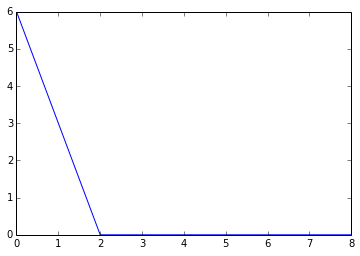

In [22]:
plot(Sigma) # therefore we need at least the first two singular values of plus

7. (10 points) Use the singular value decomposition to Önd the least squares line for the data below

1. Create a column (vertically stacked) vector Y

In [23]:
Y = vstack([0,0,2,4,4,6,8,10,10,12])
Y

array([[ 0],
       [ 0],
       [ 2],
       [ 4],
       [ 4],
       [ 6],
       [ 8],
       [10],
       [10],
       [12]])

2. Create a $10*2$ ( 10 rows by 2 columns ) matrix A in which x values are in the 
$0^{th}$ column and 1ís are in the 1 column.

In [24]:
A = zeros((10,2))
A[:,1] = 1
A[:,0] = array([0,1,2,3,4,5,6,7,8,9])
A

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.]])

3. The slope and intercept for the least squares line are estimated by $a^\dagger * Y$

In [25]:
V, Sigma, Uh = linalg.svd(A)

In [26]:
Sigmadag = copy(Sigma)
Sigmadag = 1. / Sigmadag
Sigmadag= np.c_[diag(Sigmadag), zeros((2,8))]
Sigmadag

array([[ 0.0585,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.5951,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ]])

In [27]:
Adag = dot(dot(Uh.T, Sigmadag),V.T)
Adag

array([[-0.0545, -0.0424, -0.0303, -0.0182, -0.0061,  0.0061,  0.0182,
         0.0303,  0.0424,  0.0545],
       [ 0.3455,  0.2909,  0.2364,  0.1818,  0.1273,  0.0727,  0.0182,
        -0.0364, -0.0909, -0.1455]])

In [28]:
dot(Adag, Y)

array([[ 1.4061],
       [-0.7273]])

ANSWER: $y = 1.4061*x - 0.7273$